# Data Wrangling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
#to plot 3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
df=pd.read_csv("/content/stories_art-et-culture.csv")

In [6]:
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   id          1000 non-null   object
 2   title       1000 non-null   object
 3   date        1000 non-null   object
 4   author      1000 non-null   object
 5   story       1000 non-null   object
 6   topic       1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [8]:
df.shape

(1000, 7)

In [9]:
df.isna().all()

Unnamed: 0    False
id            False
title         False
date          False
author        False
story         False
topic         False
dtype: bool

Non Duplicated values

In [10]:
df.duplicated().sum()

0

In [11]:
#delet unuseful columns
df.drop('id',axis=1,inplace=True)


In [12]:
df.drop('Unnamed: 0',axis=1,inplace= True)

In [13]:
df.columns

Index(['title', 'date', 'author', 'story', 'topic'], dtype='object')

Non duplicated values

### Cleaning and processing data

In [14]:
# Expanding Contractions (you may need to define the contraction mapping)
contraction_mapping = {
    # Define your contraction mapping here
    "don't": "do not",
    "can't": "cannot",
    # Add more contractions and their expansions as needed
}

In [15]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contraction_mapping:
            text = text.replace(word, contraction_mapping[word.lower()])
    return text

In [16]:
# Lower casing
df['title'] = df['title'].str.lower()
df['author'] = df['author'].str.lower()
df['story'] = df['story'].str.lower()
df['topic'] = df['topic'].str.lower()

In [17]:
# Removing punctuations
def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)

df['title'] = df['title'].apply(remove_punctuations)
df['author'] = df['author'].apply(remove_punctuations)
df['story'] = df['story'].apply(remove_punctuations)

In [18]:
# Removing words and digits containing digits
def remove_words_with_digits(text):
    return re.sub(r'\w*\d\w*', '', text)

df['title'] = df['title'].apply(remove_words_with_digits)
df['author'] = df['author'].apply(remove_words_with_digits)
df['story'] = df['story'].apply(remove_words_with_digits)

In [19]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
# Removing stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['title'] = df['title'].apply(remove_stopwords)
df['author'] = df['author'].apply(remove_stopwords)
df['story'] = df['story'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# Rephrasing text (if needed, you may use a predefined mapping for rephrasing)
rephrase_mapping = {
    # Define your rephrasing mapping here
}

def rephrase_text(text):
    for word in text.split():
        if word.lower() in rephrase_mapping:
            text = text.replace(word, rephrase_mapping[word.lower()])
    return text

df['title'] = df['title'].apply(rephrase_text)
df['author'] = df['author'].apply(rephrase_text)
df['story'] = df['story'].apply(rephrase_text)

In [22]:
# Stemming and Lemmatization
nltk.download('punkt')
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['title'] = df['title'].apply(stem_text)
df['author'] = df['author'].apply(stem_text)
df['story'] = df['story'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# Removing extra spaces
df['title'] = df['title'].apply(lambda x: ' '.join(x.split()))
df['author'] = df['author'].apply(lambda x: ' '.join(x.split()))
df['story'] = df['story'].apply(lambda x: ' '.join(x.split()))
df['topic'] = df['topic'].apply(lambda x: ' '.join(x.split()))

In [24]:
# Removing URLs (if present)
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

df['title'] = df['title'].apply(remove_urls)
df['author'] = df['author'].apply(remove_urls)
df['story'] = df['story'].apply(remove_urls)


###  Data Exploration and Analysis

In [25]:
# Number of examples per class
num_examples_per_class = df['topic'].value_counts()
num_examples_per_class

art-et-culture    1000
Name: topic, dtype: int64

In [26]:
# lengths of examples in words and letters
df['num_words'] = df['title'].apply(lambda x: len(str(x).split()))
df['num_letters'] = df['title'].apply(lambda x: len(str(x)))

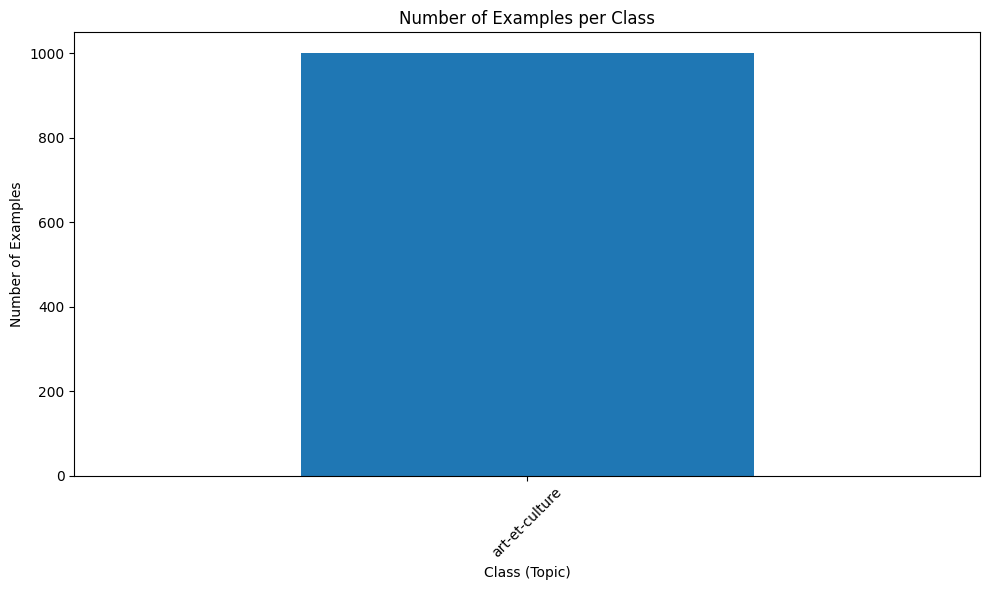

In [27]:
# Visualize number of examples per class
plt.figure(figsize=(10, 6))
num_examples_per_class.plot(kind='bar')
plt.title('Number of Examples per Class')
plt.xlabel('Class (Topic)')
plt.ylabel('Number of Examples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

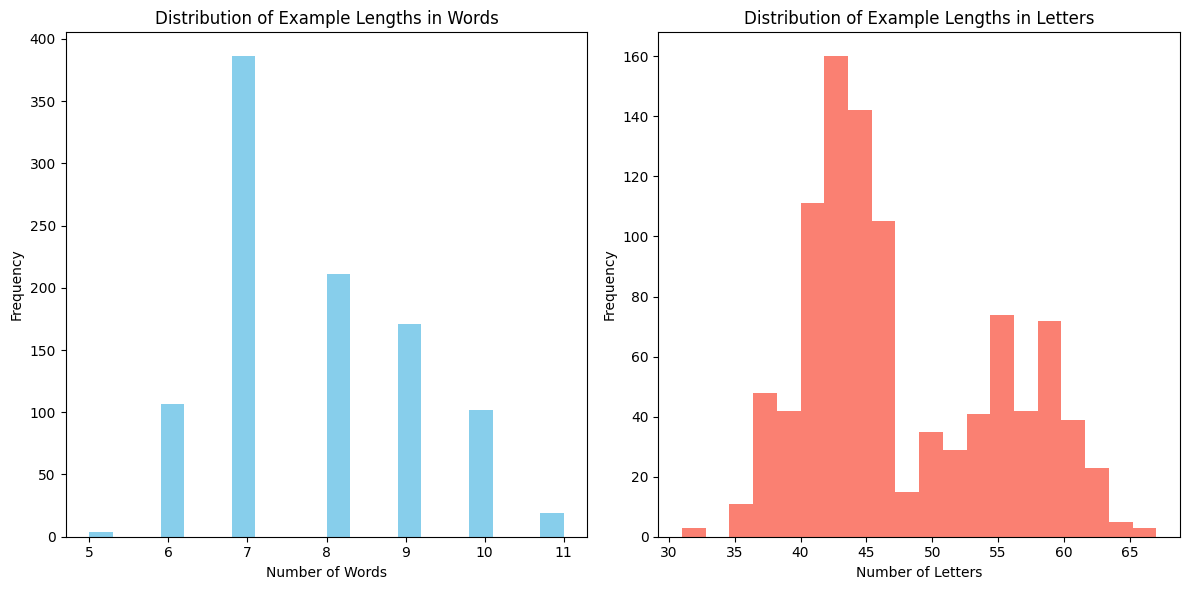

In [28]:
# Visualize lengths of examples in words and letters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['num_words'], bins=20, color='skyblue')
plt.title('Distribution of Example Lengths in Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['num_letters'], bins=20, color='salmon')
plt.title('Distribution of Example Lengths in Letters')
plt.xlabel('Number of Letters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [29]:
df.to_csv("report.csv", index=False)

## Data Preprocessing and Modeling

In [43]:
#split data
X= df["title"]
y=df["topic"]

In [48]:
text_data = df['title']
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(text_data)

In [49]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['topic'])

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

rf_clf = rf_clf.fit(X_train,y_train)


y_pred = rf_clf.predict(X_test)

y_train_acc = rf_clf.score(X_train, y_train)
y_test_acc = rf_clf.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')
print("Accuracy:",(y_pred))

train_accuracy:1.0
test_accuracy1.0
Accuracy: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [54]:
from sklearn.metrics import classification_report
report_model_rf = classification_report(y_test, y_pred)
print("Classification Report (RandomForestClassifier):")
print(report_model_rf)

Classification Report (RandomForestClassifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



the RandomForestClassifier demonstrated excellent performance on the given

binary classification task, achieving perfect precision, recall, and F1-score

 for the positive class. The model's accuracy of 100% further reinforces its strong predictive capability.

And this short discription about concepts

Precision measures the accuracy of positive predictions among all instances predicted as positive.

Recall measures the ability of the model to correctly identify positive instances.

F-score is the harmonic mean of precision and recall, providing a balanced score for evaluating binary classification models.

In [55]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')
print("Accuracy:",(y_pred))

train_accuracy:1.0
test_accuracy1.0
Accuracy: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [56]:
from sklearn.metrics import classification_report
report_model_dt = classification_report(y_test, y_pred)
print("Classification Report (DecisionTreeClassifier):")
print(report_model_dt)

Classification Report (DecisionTreeClassifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



the Decision Tree demonstrated excellent performance on the given

binary classification task, achieving perfect precision, recall, and F1-score

 for the positive class. The model's accuracy of 100% further reinforces its strong predictive capability.

And this short discription about concepts

Precision measures the accuracy of positive predictions among all instances predicted as positive.

Recall measures the ability of the model to correctly identify positive instances.

F-score is the harmonic mean of precision and recall, providing a balanced score for evaluating binary classification models.

In [60]:
#save model
import joblib
joblib.dump(rf_clf, 'Herpess_model.pkl')

['Herpess_model.pkl']

Precision measures the accuracy of positive predictions among all instances predicted as positive.
Recall measures the ability of the model to correctly identify positive instances.
F-score is the harmonic mean of precision and recall, providing a balanced score for evaluating binary classification models.